# DAT158 ML Oblig 2 - Predicting House prices

Group 27

## Setup

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
#import seaborn as sns

# To automatically reload modules defined in external files.
%reload_ext autoreload
%autoreload 2

# To make the notebook reproducible
seed = 42
np.random.seed(seed)
sessionId = 111

## Frame the problem and look at the big picture

The assignment is to train a machine learning model and deploy the model. The model is trained to predict the sale price based on 79 features.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

It is **supervised learning**, since I got given labeled training examples.

It is a **regression task** with multiple features, since I will predict a value.

**Batch learning**, no need to adjust to changing data and small enough to fit in memory.

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

## Get the data

### Import the data

In [2]:
# lists the files in the folder
import os
print(os.listdir("dataOblig2"))

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
train = pd.read_csv('dataOblig2/train.csv')
test = pd.read_csv('dataOblig2/test.csv')
sampleSubmission = pd.read_csv('dataOblig2/sample_submission.csv')

### Understanding the data

You can find a description of all the features here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

You can also find it in the folder dataOblig2: data_description.txt

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

Notice that there are 79 feature columns and one target column (SalePrice).

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Sjekke antall (count)

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
numeric_features = train.select_dtypes(include=np.number).columns
len(numeric_features) 
# 37 Numeric features (excluding Id)

38

In [12]:
categorial_features = train.select_dtypes(include='object').columns
len(categorial_features) 
# 43 Categorial features

43

In [13]:
train.isnull().sum().sort_values(ascending=False)[:19]
#19 because there is 19 features that have missing values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [14]:
high_missingValues_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
# Features with many missing values

## Explore and visualize the data to gain insights

### Histogram of numeric features

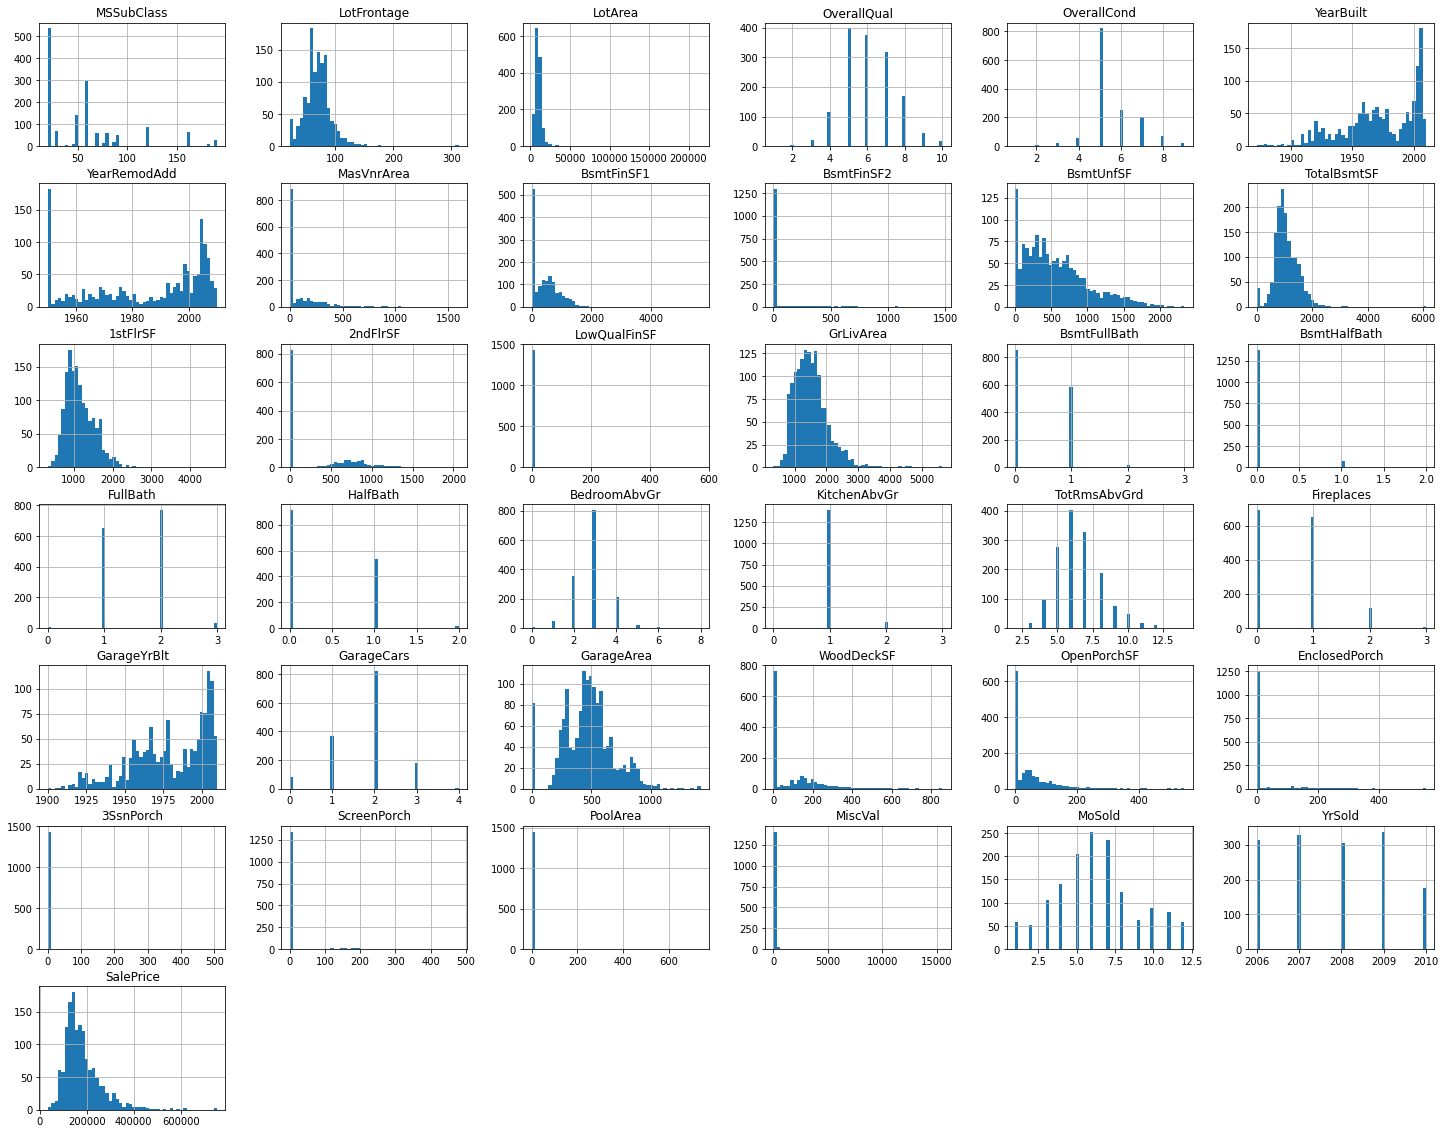

In [15]:
trainC = train.copy().drop("Id", axis=1)
trainC.hist(bins=50, figsize=(25,20))
plt.show()

### Selecting the Prediction Target

In [20]:
y = train.SalePrice
y.shape

(1460,)

In [16]:
train_temp = train.copy()

### Correlation with the SalePrice

In [17]:
corr_matrix = train_temp.corr()

In [18]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Scatter Matrix Plot

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', yla

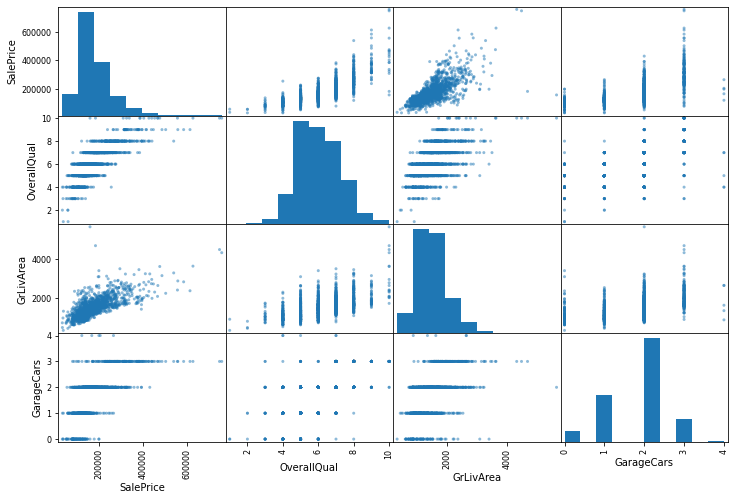

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]
scatter_matrix(train_temp[attributes], figsize=(12, 8))

### Zoom in to the most promising attribute (GrLivArea)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

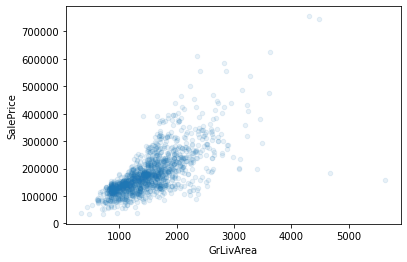

In [20]:
train_temp.plot(kind="scatter", x="GrLivArea", y="SalePrice",
             alpha=0.1)

## Data preparation

In [ ]:
#TODO define numeric and categorical

## Setting up the environment in PyCaret

In [21]:
from pycaret.regression import *

In [22]:
data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, session_id=sessionId)

,Description,Value
0,session_id,111
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,20
5,Categorical Features,60
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1168, 400)"


In [ ]:
# data = setup(data=dataset, target='median_house_value', train_size=.99, numeric_imputation='median', normalize=True, normalize_method='robust')

### Select models

In [23]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [26]:
best_models = compare_models(n_select=4, sort='RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16925.9099,762321718.2656,26393.4571,0.8795,0.1376,0.1005,0.4880
par,Passive Aggressive Regressor,16259.2203,1006670646.6990,29494.6116,0.8339,0.1390,0.0967,0.4390
lightgbm,Light Gradient Boosting Machine,17227.8509,829362792.5850,27799.6484,0.8674,0.1425,0.1016,0.1280
huber,Huber Regressor,16058.2562,995426824.1381,28985.0865,0.8354,0.1431,0.0963,0.3810
br,Bayesian Ridge,17718.5053,1082427145.2703,30959.5829,0.8209,0.1557,0.1067,0.1920
rf,Random Forest Regressor,18159.7454,910673832.7712,29101.9534,0.8541,0.1560,0.1110,1.3030
en,Elastic Net,20402.7246,1365838649.9717,35473.0543,0.7769,0.1631,0.1188,0.0310
omp,Orthogonal Matching Pursuit,17451.0361,1208137973.4550,32309.3471,0.7988,0.1646,0.1028,0.0280
knn,K Neighbors Regressor,21516.0945,1234991072.1222,34275.9318,0.7984,0.1762,0.1263,0.1060
ridge,Ridge Regression,18749.1232,1210091545.5219,32919.4254,0.7972,0.1788,0.1124,0.0300


In [27]:
best_models

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=111, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                            epsilon=0.1, fit_intercept=True,
                            loss='epsilon_insensitive', max_iter=1000,
                            n_iter_no_change=5, random_state=111, shuffle=True,
                            tol=0.001, va

### Hyperparameter tuning

In [34]:
#tuned_best_model = tune_model(best_models, optimize='RMSLE', n_iter=2)
tuned_best_models = [tune_model(i, optimize='RMSLE', n_iter=4) for i in best_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13407.3581,521903556.5296,22845.2086,0.9041,0.1415,0.0914
1,17301.0885,670044689.3826,25885.2214,0.8707,0.1542,0.1122
2,13571.2465,362155269.8644,19030.3776,0.9352,0.1131,0.0845
3,18686.2706,2234175381.4126,47267.0644,0.7150,0.1568,0.1013
4,18406.6373,3265167449.8648,57141.6437,0.4199,0.1770,0.1177
5,15390.5641,592345793.1719,24338.1551,0.8860,0.1412,0.0969
6,13986.4584,338350571.5754,18394.3081,0.8988,0.1080,0.0820
7,15171.3640,705545685.2333,26562.1100,0.9189,0.1211,0.0820
8,14028.6181,377508926.5717,19429.5889,0.9397,0.1123,0.0799
9,18264.2683,915278687.7912,30253.5731,0.8728,0.1500,0.1020


In [ ]:
# n_iter=2: Mean	48969.6162	5326600297.5656	72365.7668	0.1208	0.3576	0.2815

In [35]:
tuned_best_models

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.05, loss='ls', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.4, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=111, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 PassiveAggressiveRegressor(C=6.539, average=False, early_stopping=False,
                            epsilon=0.8, fit_intercept=False,
                            loss='epsilon_insensitive', max_iter=1000,
                            n_iter_no_change=5, random_state=111, shuffle=True,
                            tol=0.

### Combining models using blender

In [36]:
blender = blend_models(estimator_list = best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13546.0142,494167225.5489,22229.8724,0.9092,0.1305,0.0882
1,15549.4678,555511156.6415,23569.2842,0.8928,0.1453,0.1007
2,12831.4661,323978406.8023,17999.4002,0.9421,0.1061,0.0800
3,19009.3416,2042689179.9827,45196.1191,0.7394,0.1472,0.0959
4,15290.6845,1272112947.1206,35666.6924,0.7740,0.1425,0.0965
5,14567.8323,549056933.8651,23431.9639,0.8943,0.1402,0.0938
6,12577.1995,305716266.1249,17484.7438,0.9085,0.0977,0.0720
7,14883.3166,705968234.6660,26570.0628,0.9189,0.1193,0.0797
8,12944.4432,336282970.3625,18338.0198,0.9463,0.1059,0.0752
9,18026.6183,927720516.7751,30458.5048,0.8711,0.1490,0.0994


In [37]:
tuned_blender = blend_models(estimator_list = tuned_best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13360.7232,525664744.1467,22927.3798,0.9034,0.1395,0.0893
1,15865.1632,586839537.2147,24224.7711,0.8867,0.1472,0.1009
2,13371.9315,365307460.9205,19113.0181,0.9347,0.1137,0.0834
3,19012.7953,2174969806.9457,46636.5716,0.7225,0.1515,0.0969
4,16992.1178,1841222452.5580,42909.4681,0.6729,0.1596,0.1080
5,15562.7375,587932233.1984,24247.3139,0.8868,0.1446,0.0993
6,13447.3442,334184161.9608,18280.7046,0.9000,0.1020,0.0761
7,14394.3505,680962905.0870,26095.2660,0.9217,0.1167,0.0773
8,13707.1514,363244923.2813,19058.9854,0.9420,0.1075,0.0788
9,19119.4777,1013856898.2486,31841.1196,0.8591,0.1607,0.1085


### Analyze results

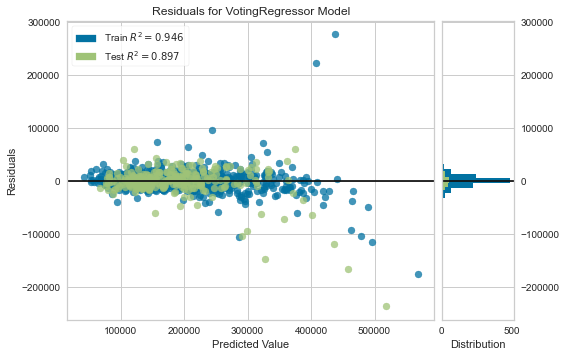

In [38]:
plot_model(blender)

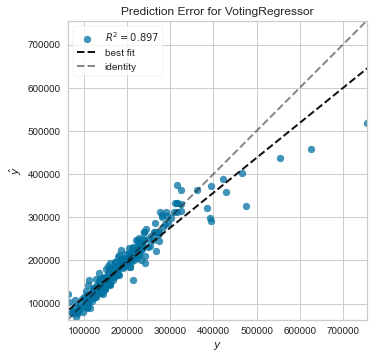

In [39]:
plot_model(blender, plot = 'error')

### Feature importance Plot

In [ ]:
#Error when trying to plot blender model:
#TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

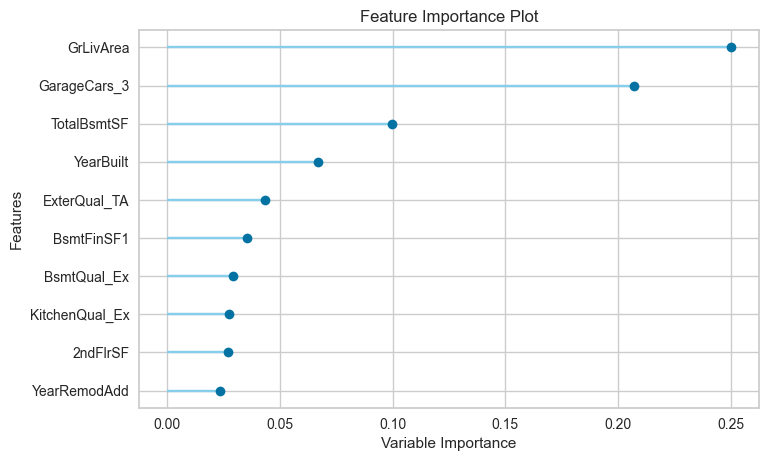

In [55]:
plot_model(best_models[0], plot='feature')

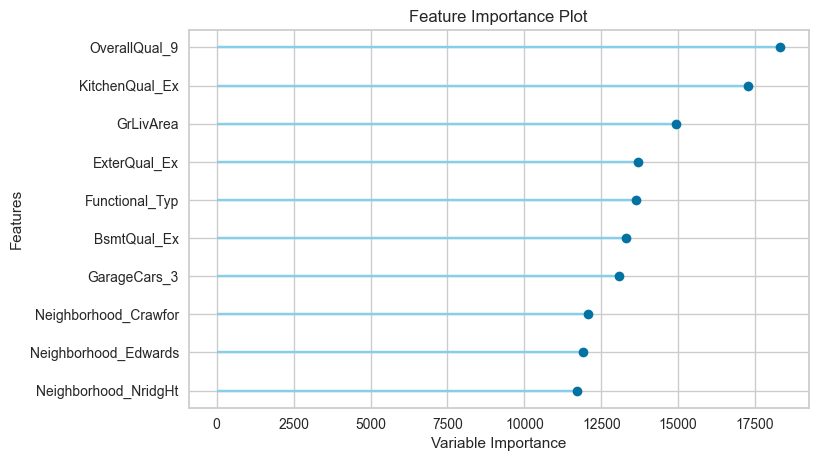

In [56]:
plot_model(best_models[1], plot='feature')

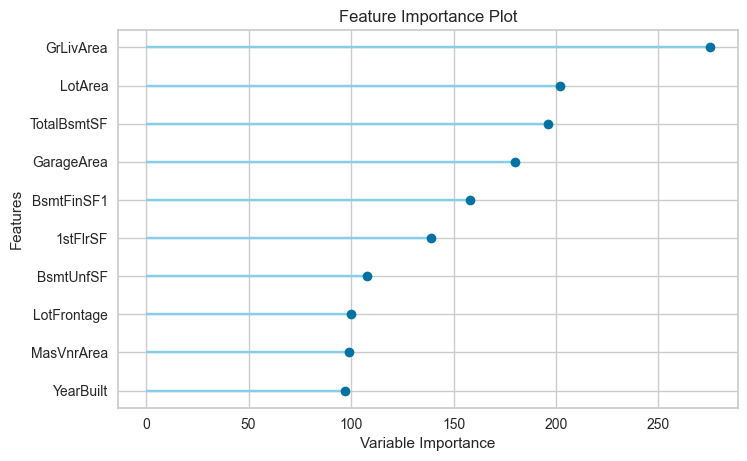

In [57]:
plot_model(best_models[2], plot='feature')

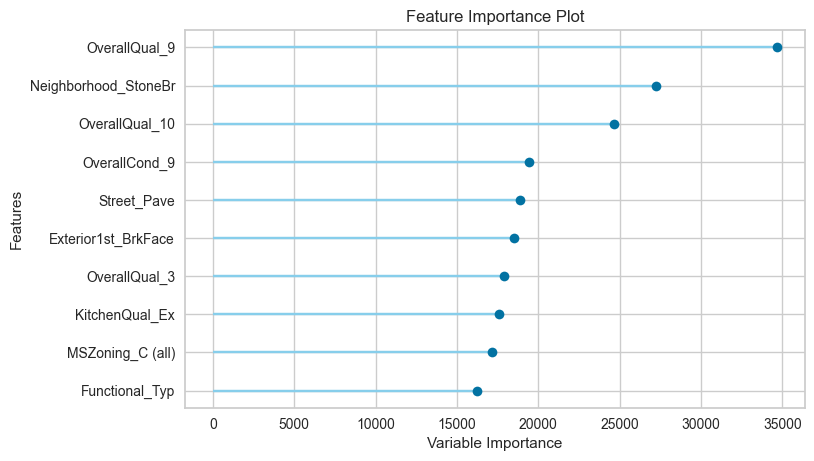

In [58]:
plot_model(best_models[3], plot='feature')

### Comparing RMSLE (generate predictions on hold-out / test set)

In [44]:
prediction_blender = predict_model(blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,14508.7785,754914644.7035,27475.7101,0.8965,0.1091,0.0758


In [45]:
prediction_tuned_blender = predict_model(tuned_blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,15046.8885,885426701.3959,29756.1204,0.8786,0.1120,0.0785


In [46]:
prediction_best = predict_model(best_models[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15860.5589,807844167.6466,28422.5996,0.8893,0.1180,0.0832


In [47]:
prediction_best_tuned = predict_model(tuned_best_models[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,18508.0484,1174935050.8109,34277.3256,0.8390,0.1323,0.0985


## Final Model

Final model is a blender of four best models based on RMSLE, without tuning.

In [48]:
# Train model(blender) on the entire dataset
final_model = finalize_model(blender)

In [52]:
prediction = predict_model(final_model, data = test)

sampleSubmission['SalePrice'] = prediction['Label']
sampleSubmission.to_csv('submission_price.csv',index=False)

sampleSubmission.head()

,Id,SalePrice
0,1461,125126.056475
1,1462,160202.180793
2,1463,191716.684934
3,1464,194210.816482
4,1465,187879.247485


### Export Model

In [53]:
save_model(final_model,'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                                             min_split_gain=0.0,
                                                             n_estimators=100,
                                                             n_jobs=-1,
                                          